# Code für Hufeld, ZDRW 1/2024, S. 58 ff.

In [2]:
# import packages and libraries for full functionality
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy import stats

/opt/anaconda3/envs/korrektorentest/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load data from .csv file into a dataframe
df = pd.read_csv("20230303_korrektoren_data_clean.csv", index_col="Unnamed: 0")

In [14]:
# take out the column with the exam-code used in the correction process
df_kor = df.iloc[:,1:]
# display correct dataframe
df_kor

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
B1,2.0,4.0,5.0,2.0,5.0,7.0,4.0,4.0,3.0,2.0,...,4.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B2,2.0,5.0,3.0,5.0,3.0,6.0,5.0,6.0,5.0,6.0,...,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B3,8.0,11.0,7.0,7.0,6.0,8.0,15.0,7.0,10.0,7.0,...,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B4,6.0,6.0,9.0,7.0,6.0,7.0,9.0,7.0,7.0,5.0,...,10.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B5,7.0,10.0,14.0,12.0,7.0,9.0,12.0,9.0,7.0,4.0,...,11.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B6,9.0,9.0,10.0,7.0,9.0,10.0,15.0,10.0,NaN,NaN,...,NaN,NaN,NaN,12.0,11.0,8.0,8.0,7.0,9.0,10.0
B7,14.0,16.0,15.0,16.0,10.0,14.0,17.0,14.0,NaN,NaN,...,NaN,NaN,NaN,13.0,15.0,13.0,16.0,13.0,11.0,14.0
B8,3.0,4.0,2.0,2.0,4.0,3.0,5.0,2.0,NaN,NaN,...,NaN,NaN,NaN,2.0,3.0,3.0,5.0,2.0,3.0,2.0
B9,4.0,3.0,4.0,2.0,2.0,3.0,6.0,3.0,NaN,NaN,...,NaN,NaN,NaN,6.0,2.0,7.0,6.0,3.0,4.0,3.0
B10,11.0,8.0,15.0,12.0,9.0,12.0,14.0,9.0,NaN,NaN,...,NaN,NaN,NaN,8.0,10.0,9.0,9.0,6.0,10.0,10.0


## Zusätzliche Zeilen, Spalten anfügen

In [86]:
# split up into DFs that only contain values, no NANs.
# transpose so that one column is one exam
df_1bis5 = df_kor.iloc[:5,:16].T
df_10bis15= df_kor.iloc[10:,8:].T
df_5bis10 = df_kor.iloc[5:10,:8].join(df_kor.iloc[5:10,16:], how='inner').T

In [87]:
# append empty row for mean values
s = pd.Series([0,0,0,0,0], index=["B1", "B2", "B3", "B4", "B5"], name="mean")
df_1bis5 = pd.concat([df_1bis5, s.to_frame().T])

# again for other DFs
s = pd.Series([0,0,0,0,0], index=["B11", "B12", "B13", "B14", "B15"], name="mean")
df_10bis15 = pd.concat([df_10bis15, s.to_frame().T])

s = pd.Series([0,0,0,0,0], index=["B6", "B7", "B8", "B9", "B10"], name="mean")
df_5bis10 = pd.concat([df_5bis10, s.to_frame().T])


In [88]:
i = 0
# loop through the exams, calculate the mean and change the 0 to the mean of the exam
# round the mean to 2 decimals
for column in df_1bis5:
    df_1bis5.iat[16,i] = round(df_1bis5[column].iloc[:-1].mean(), 2)
    i += 1
i = 0

# repeat for 5-10 und 10-15 as well
for column in df_10bis15:
    df_10bis15.iat[15,i] = round(df_10bis15[column].iloc[:-1].mean(), 2)
    i += 1
i = 0

for column in df_5bis10:
    df_5bis10.iat[15,i] = round(df_5bis10[column].iloc[:-1].mean(), 2)
    i += 1


In [89]:
# append empty row for biggest difference values
s = pd.Series([0,0,0,0,0], index=["B1", "B2", "B3", "B4", "B5"], name="max_diff")
df_1bis5 = pd.concat([df_1bis5, s.to_frame().T])

# again for other DFs
s = pd.Series([0,0,0,0,0], index=["B11", "B12", "B13", "B14", "B15"], name="max_diff")
df_10bis15 = pd.concat([df_10bis15, s.to_frame().T])

s = pd.Series([0,0,0,0,0], index=["B6", "B7", "B8", "B9", "B10"], name="max_diff")
df_5bis10 = pd.concat([df_5bis10, s.to_frame().T])


In [90]:
i = 0
# loop through the exams, calculate the maximum difference and change the 0 to this value
for column in df_1bis5:
    df_1bis5.iat[17,i] = df_1bis5[column].iloc[:16].max() - df_1bis5[column].iloc[:16].min() 
    i += 1
i = 0

# repeat for 5-10 und 10-15 as well
for column in df_10bis15:
    df_10bis15.iat[16,i] = df_10bis15[column].iloc[:16].max() - df_10bis15[column].iloc[:16].min() 
    i += 1
i = 0

for column in df_5bis10:
    df_5bis10.iat[16,i] = df_5bis10[column].iloc[:16].max() - df_5bis10[column].iloc[:16].min()
    i += 1

In [91]:
# join the dataframes of 1-5, 5-10 and 10-15 together
# bottom row has NANs because 5-15 are one shorter than 1-5

df_1bis15 = df_1bis5[:16].reset_index(drop=True).join(df_5bis10[:15].reset_index(drop=True).join(df_10bis15[:15].reset_index(drop=True), how="inner"), how="outer")

## Normaltest

In [115]:
for i in range(1,16):
    p = stats.normaltest(df_1bis15.iloc[:23,i-1:i], nan_policy="omit")[1]
    print(p)

[0.27830134]
[0.22714319]
[0.00023479]
[0.22174095]
[0.6462155]
[0.01589845]
[0.5017667]
[0.35625685]
[0.3736569]
[0.516727]
[0.13581663]
[0.39368821]
[0.34277683]
[0.23608126]
[0.74871]


/opt/anaconda3/envs/korrektorentest/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/envs/korrektorentest/lib/python3.8/site-packages/scipy/stats/mstats_basic.py:2597: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn(


## Boxplot pro Klausur

In [92]:
# reorder the DF by the mean value of each exam, lowest first, so that boxplot is in ascending order
df_boxplot = df_1bis15.reindex(df_1bis15.mean().sort_values().index, axis=1)

/opt/anaconda3/envs/korrektorentest/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


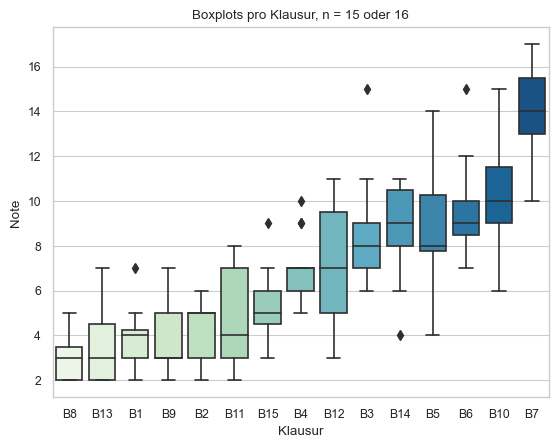

In [93]:
# create an overview graph of the different boxplots

sns.set_context('paper', font_scale=1)
sns.set_style("whitegrid")
klausur_box = sns.boxplot(data=df_boxplot[:16], palette="GnBu").set(xlabel="Klausur", 
                                                                   ylabel="Note", title="Boxplots pro Klausur, n = 15 oder 16")
# The line below saves the plot as a figure. Uncomment if you want to save the plot to your device as a png.
#plt.pyplot.savefig("alle_Klausuren_boxplots_300_dpi.png", dpi=300)

## Boxplot pro Korrektor

In [97]:
# create a list of the means of each column
means = []

for column in df_kor:
    means.append(df_kor[column].mean())

# make the list of means into a pandas series with the correct index and name
#concatenate with existing dataframe

means_series = pd.Series(means, name="mean", index=['A', 'B','C','D','E','F','G','H','I','J','K','L',
                                                    'M','N','O','P','Q','R','S','T','U','V','W'])
df_kor = pd.concat([df_kor, means_series.to_frame().T])

In [99]:
# create list of which group each person was in and append

groups = pd.Series(["1-10", "1-10","1-10","1-10","1-10", "1-10", "1-10", "1-10",
           "1-5&10-15","1-5&10-15","1-5&10-15","1-5&10-15","1-5&10-15","1-5&10-15","1-5&10-15","1-5&10-15",
           "5-15","5-15","5-15","5-15","5-15","5-15","5-15",], name="group", index=['A', 'B','C','D',
                                                    'E','F','G','H','I','J','K','L',
                                                    'M','N','O','P','Q','R','S','T','U','V','W'])
df_kor = pd.concat([df_kor, groups.to_frame().T])

In [100]:
# sort by means of each corrector, lowest first

df_kor = df_kor.sort_values(by="mean", axis=1)

In [101]:
# reformat the DF to be able to differentiate the colours in the boxplot

df_box_kor = df_kor.T
df_box_kor['cor'] = df_box_kor.index
df_box_kor = df_box_kor.melt(id_vars=["group", "cor"])

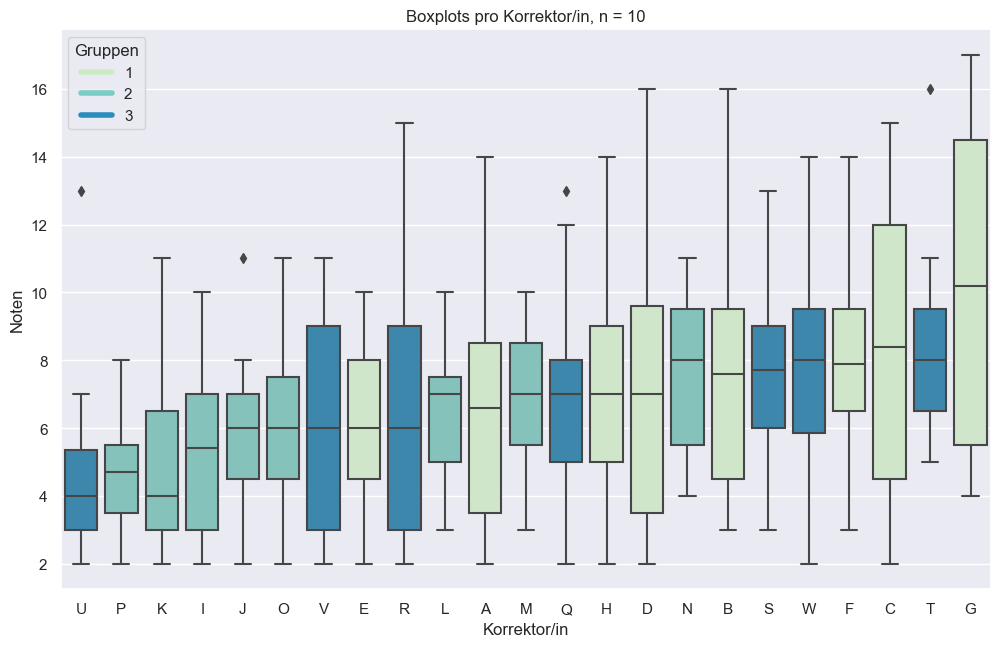

In [102]:
# create a boxplot of all the correctors, differentiated by colour
sns.set_context('paper', font_scale=1)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,7.27)})
my_colours = {x: '#ccebc5' if x in ['A','B','C','D','E','F','G','H'] else '#7bccc4' if x in 
             ['I','J','K','L','M','N','O','P'] else '#2b8cbe' for x in df_box_kor.cor.unique()}
sns.boxplot(data=df_box_kor, x="cor", y="value", palette=my_colours).set(
    xlabel="Korrektor/in", ylabel="Noten", title="Boxplots pro Korrektor/in, n = 10")


# workaround to get the legend right. Create objects with a colour attached so that they show up correctly.
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#ccebc5', lw=4),
                Line2D([0], [0], color='#7bccc4', lw=4),
                Line2D([0], [0], color='#2b8cbe', lw=4)]

plt.legend(custom_lines, ["1", "2", "3"], loc="upper left", title="Gruppen")

# The line below saves the plot as a figure. Uncomment if you want to save the plot to your device as a png.
#plt.savefig("alle_Korrektoren_boxplots_300_dpi.png", dpi=300)

## Hypothesentest Darstellung

In [103]:
# random values to create a kde line that has the desired mean and std
h1_results_array = np.random.normal(loc=6.83,scale=1.85,size=100000)

[(0.0, 18.0),
 Text(0.5, 0, 'Note'),
 Text(0, 0.5, 'Verteilungsdichte'),
 Text(0.5, 1.0, 'Normalverteilungskurve der Ergebnisse einer Klausur, µ = 6,83, σ = 1,85')]

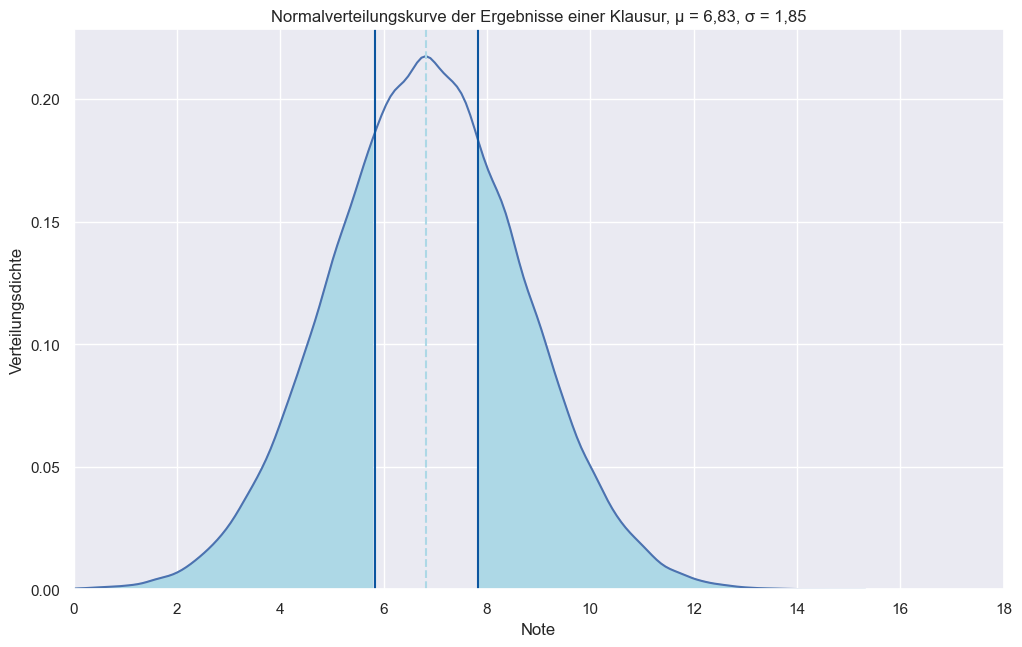

In [104]:

# create actual plot
ax = sns.kdeplot(h1_results_array)

# insert solid lines left and right to show +/- 1 limits 
plt.axvline(x=5.83, color="#0B559F")
plt.axvline(x=7.83, color="#0B559F")

# insert dashed line to show mean at 6.83
plt.axvline(x=6.83, color="#ADD8E6", linestyle="--")

# colour the area under the curve that is not within the +/- 1 point range from the average
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=(kde_x<5.83) | (kde_x>7.83) , 
                interpolate=True, color='#ADD8E6')

# limit scale to start at 0 and go to 18; add title and axis lables
ax.set(xlim=(0,18), xlabel="Note", ylabel="Verteilungsdichte", title="Normalverteilungskurve der Ergebnisse einer Klausur, µ = 6,83, \u03C3 = 1,85")

# The line below saves the plot as a figure. Uncomment if you want to save the plot to your device as a png.
#plt.savefig("normalverteilung_limits_300_dpi.png", dpi=300)

<AxesSubplot: ylabel='Density'>

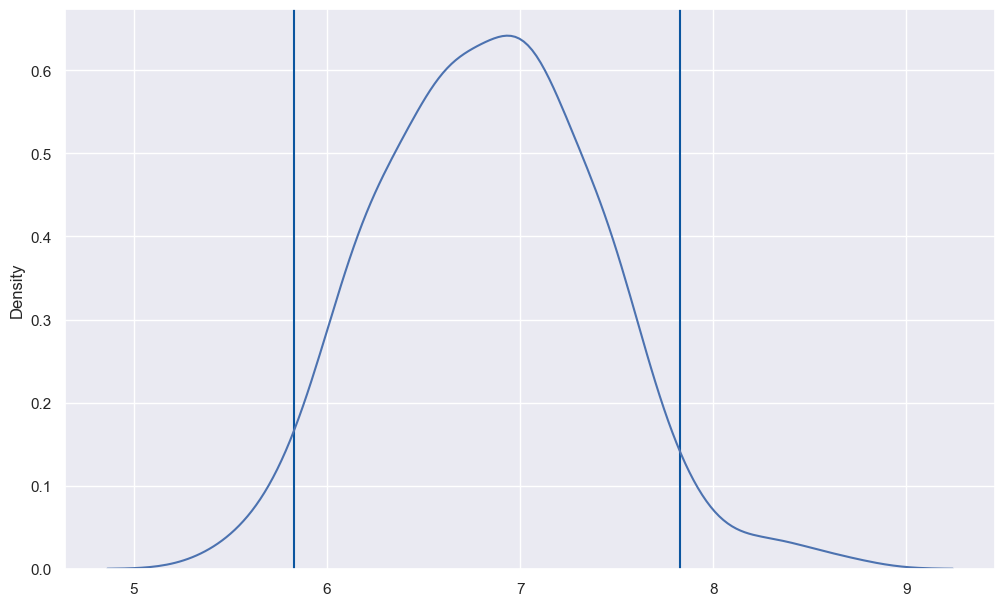

In [111]:
# random values to create a kde line where 90% of corrections are between the lines, corresponding to H0
# std value calculated from z-scores
h0_results_array = np.random.normal(loc=6.83,scale=.606,size=230)
plt.axvline(x=5.83, color="#0B559F")
plt.axvline(x=7.83, color="#0B559F")
sns.kdeplot(h0_results_array)

In [112]:
# take the raw experimental data, put into array
correction_values = df_1bis15.melt().value
# delete the NANs
correction_values = correction_values[~np.isnan(correction_values)]

# calculate the F value, measure of the difference between the variances
#F = np.var(correction_values) / np.var(h0_results_array)

# calculate a p-value from the F-value
#stats.f.cdf(F, 229, 99999)

# alpha level doesn't matter here, as p value is sufficient for every possible alpha.

# calculate Levene test
statistic, pvalue = stats.levene(correction_values, h0_results_array, center="mean")

In [113]:
pvalue

6.1642559933774634e-52

## Intraclass Correlation Coefficient

In [128]:
# import package that has intraclass correlation functionality
import pingouin as pg

/opt/anaconda3/envs/korrektorentest/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [129]:
# create DFs appropriate as input for calculating the ICC with pengouin package
# the following line takes a slice of the df_klaus and melts it into the right long format

df_1bis5_icc = df_1bis5.iloc[:16,:].reset_index(names="Korrektor").melt(id_vars=["Korrektor"], value_vars=
                                                          ['B1', 'B2', 'B3', 'B4', 'B5'])

df_10bis15_icc = df_10bis15.iloc[:15,:].reset_index(names="Korrektor").melt(id_vars=["Korrektor"], value_vars=
                                                          ['B11', 'B12', 'B13', 'B14', 'B15'])

df_5bis10_icc = df_5bis10.iloc[:15,:].reset_index(names="Korrektor").melt(id_vars=["Korrektor"], value_vars=
                                                          ['B6', 'B7', 'B8', 'B9', 'B10'])

In [130]:
# calculate the intraclass correlation coefficient as measure of inter-rater reliability
# calculated by pack of 5 exams, because calculation needs full set of data

icc_1bis5 = pg.intraclass_corr(data=df_1bis5_icc, targets='variable', raters='Korrektor', ratings='value')
icc_5bis10 = pg.intraclass_corr(data=df_5bis10_icc, targets='variable', raters='Korrektor', ratings='value')
icc_10bis15 = pg.intraclass_corr(data=df_10bis15_icc, targets='variable', raters='Korrektor', ratings='value')

In [131]:
# display ICC for group 1-5
icc_1bis5.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.617626,26.84390,4,75,7.793867e-14,"[0.34, 0.93]"
ICC2,Single random raters,0.619839,35.48414,4,60,3.405744e-15,"[0.34, 0.93]"
ICC3,Single fixed raters,0.683069,35.48414,4,60,3.405744e-15,"[0.4, 0.95]"
ICC1k,Average raters absolute,0.962748,26.84390,4,75,7.793867e-14,"[0.89, 1.0]"
ICC2k,Average random raters,0.963082,35.48414,4,60,3.405744e-15,"[0.89, 1.0]"
ICC3k,Average fixed raters,0.971818,35.48414,4,60,3.405744e-15,"[0.92, 1.0]"


In [132]:
# display ICC for group 5-10
icc_5bis10.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.861066,93.965278,4,70,2.191880e-27,"[0.67, 0.98]"
ICC2,Single random raters,0.861379,124.137615,4,56,3.806496e-27,"[0.67, 0.98]"
ICC3,Single fixed raters,0.891413,124.137615,4,56,3.806496e-27,"[0.73, 0.99]"
ICC1k,Average raters absolute,0.989358,93.965278,4,70,2.191880e-27,"[0.97, 1.0]"
ICC2k,Average random raters,0.989385,124.137615,4,56,3.806496e-27,"[0.97, 1.0]"
ICC3k,Average fixed raters,0.991944,124.137615,4,56,3.806496e-27,"[0.98, 1.0]"


In [133]:
# display ICC for group 10-15
icc_10bis15.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.490326,15.430549,4,70,4.274873e-09,"[0.22, 0.89]"
ICC2,Single random raters,0.498441,29.458007,4,56,3.359090e-13,"[0.23, 0.9]"
ICC3,Single fixed raters,0.654839,29.458007,4,56,3.359090e-13,"[0.37, 0.94]"
ICC1k,Average raters absolute,0.935193,15.430549,4,70,4.274873e-09,"[0.81, 0.99]"
ICC2k,Average random raters,0.937134,29.458007,4,56,3.359090e-13,"[0.81, 0.99]"
ICC3k,Average fixed raters,0.966053,29.458007,4,56,3.359090e-13,"[0.9, 1.0]"


In [135]:
res = stats.pearsonr(df_1bis5.iloc[:16,:].iloc[2], df_1bis5.iloc[:16,:].iloc[1])
res

(0.6164376421151387, 0.2681446067533828)